In [1]:
import torch
import torchvision
import numpy as np
import cv2

[1691820774.456988] [zhaobenyan-100375-99c9d9685-cghqp:69850:f]        vfs_fuse.c:281  UCX  ERROR inotify_add_watch(/tmp) failed: No space left on device


In [2]:

# 加载训练好的神经网络
model = torchvision.models.resnet18(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 11.4MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
# 选择一个输入图像作为可视化的对象
image_path = "./data/pictures/both.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
image = image.astype(np.float32) / 255.0
image = np.transpose(image, (2, 0, 1))
image = torch.from_numpy(image)
image = image.unsqueeze(0)

# 计算损失函数对该输入的导数
image.requires_grad = True
output = model(image)
print(f"output={output.shape}")

output=torch.Size([1, 1000])


In [4]:
loss = torch.nn.functional.softmax(output, dim=1)[0, 0]
loss.backward()
grad = image.grad.data.cpu().numpy()[0]
grad = np.abs(grad).max(axis=0)
print(f"grad={grad.shape}")

grad=(224, 224)


In [6]:
# 可视化导数
grad *= 255.0 / grad.max()
grad = np.uint8(grad)
grad = cv2.resize(grad, (image.shape[3], image.shape[2]))

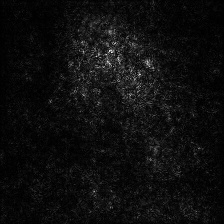

In [7]:
# 保存梯度图像
cv2.imwrite("./gradient.jpg", grad)

# 在Notebook中显示梯度图像
from IPython.display import Image
Image(filename="./gradient.jpg")